<h1> Textual Analysis</h1>
    <h3> Compare Three History Books on Lebanon </h3>
    <h4> Import Libraries </h4>

In [1]:
import PyPDF2 as PDF
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

<h1> Import the Documents for Analysis </h1>
    <h4> Declare two lists that contain: 
    <br>   1) the document names - PDF files 
    <br>   2) list of words of interest. 
    <br> The words will be compared across the documents
    </h4>

In [18]:
books = [
        'books/A History of Modern Lebanon by Fawwaz Traboulsi (z-lib.org).pdf',
        'books/A House of Many Mansions, The History of Lebanon Reconsidered by Salibi, Kamal S (z-lib.org).pdf',
        'books/Lebanon The Fractured Country by David Gilmour (z-lib.org).pdf'
        ]

vocabulary = ["lebanon", "syria", "sunni", "christian", "druze"]


 <h1> Preprocess Text </h1>   
    <h4>  Get-dictionary is a function that reads a PDF file and returns a dictionary object. 
    <br> The function will utilize a PDF file reader to extract all the words, excluding puntutions, and build a list. 
    <br> The process also uses a regular expression, via the "findall" function in the PDF module, to create a list.
    <br> Return will leverage the "Counter" function in the module collection to count the occurences of each word in the text.
    <br> The dictionary function will convert the list of words into a key-value pair, and return a dictionary. 
    </h4>
   

In [19]:
def get_dict( book_title ):
    with open( book_title, 'rb' ) as f1:
        pdf = PDF.PdfFileReader(f1)
   
        book_words = []
        for n in range(pdf.getNumPages()):
            book_words += re.findall(r'\w+', pdf.getPage(n).extractText().lower())
        
    return( dict( Counter( book_words ) ) )



<h3> This subsection builds a matrix of individual word frequencies across all books</h3>
<h4>
    <br> The following example shows the count of each word of interest across all books. 
    <br> In this example, we have five words and three books. 
    <br> Part 1: invokes the dictionary creation function and places one dictionary for each book in the books dictionary.
    <br> Part 2: for each word of interest, build a matrix that collects the word counts across each book.
</h4>

<h4>[[901, 632, 573], [236, 328, 128], [39, 3, 61], [218, 248, 61], [183, 150, 38]]
    
<br> Part 3: leverage pandas to build a data frame. 
    <ul>               Lebanon The Fractured Country   
    <li>lebanon                               573  
    <li>syria                                 128  
    <li>sunni                                  61  
    <li>christian                              61  
    <li>druze                                  38 
    </ul>
</h4>

In [20]:
book_dicts = []
for book in books:
    print(book)
    book_dicts.append( get_dict( book ) )

matrix = []
for vocab in vocabulary:
    book_list = []
    for i in range(len(book_dicts)):
        book_list.append( book_dicts[i][vocab])
    matrix.append( book_list )

df = pd.DataFrame(matrix, index = vocabulary,columns = titles)


books/A History of Modern Lebanon by Fawwaz Traboulsi (z-lib.org).pdf
books/A House of Many Mansions, The History of Lebanon Reconsidered by Salibi, Kamal S (z-lib.org).pdf
books/Lebanon The Fractured Country by David Gilmour (z-lib.org).pdf


<h1> Plot the Data </h1>
<h4> The dataframe is a key-value pair, grouped by each book, where the word is the key, and the number of occurrences is the value. 
   <br> Build a list of book titles from the books' list. 
   <br> Plot the data using pandas dataframe.
</h4>

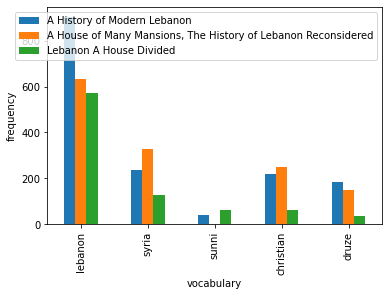

In [21]:
                       
titles = []
for title in books:
    titles.append( title[ title.index('/') + 1 : title.index('by') -1 ])


ax= df.plot.bar()
ax.set_xlabel('vocabulary')
ax.set_ylabel('frequency')
plt.show()

<h1> Euclidean Distance </h1>
<h4> Compute the Euclidean distance between two vectors, for each of the selected words, in each document pair</h4>





In [98]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

for i in range(len(vocabulary)):
    modern    = np.array( matrix[i][0] )
    mansions  = np.array( matrix[i][1] )
    fractured = np.array( matrix[i][2] )
    modernmansions = euclidean_distance (modern , mansions)
    print('Euclidean distance for the word [' + vocabulary[ i ] + ']')
    print(' in [' + titles[ 0 ] + '] vs. [' + titles [ 1 ][:23] + f']: {modernmansions:.2f}')

    modernfractured = euclidean_distance(modern, fractured)
    print(' in [' + titles[ 0 ] + '] vs. [' + titles [ 2 ] + f']: {modernfractured:.2f}')
 
    mansionsfractured = euclidean_distance(mansions, fractured)
    print(' in [' + titles[ 1 ][:24] + '] vs. [' + titles [ 2 ] + f']: {mansionsfractured:.2f}')

    print('\n')


Euclidean distance for the word [lebanon]
 in [A History of Modern Lebanon] vs. [A House of Many Mansion]: 269.00
 in [A History of Modern Lebanon] vs. [Lebanon The Fractured Country]: 328.00
 in [A House of Many Mansions] vs. [Lebanon The Fractured Country]: 59.00


Euclidean distance for the word [syria]
 in [A History of Modern Lebanon] vs. [A House of Many Mansion]: 92.00
 in [A History of Modern Lebanon] vs. [Lebanon The Fractured Country]: 108.00
 in [A House of Many Mansions] vs. [Lebanon The Fractured Country]: 200.00


Euclidean distance for the word [sunni]
 in [A History of Modern Lebanon] vs. [A House of Many Mansion]: 36.00
 in [A History of Modern Lebanon] vs. [Lebanon The Fractured Country]: 22.00
 in [A House of Many Mansions] vs. [Lebanon The Fractured Country]: 58.00


Euclidean distance for the word [christian]
 in [A History of Modern Lebanon] vs. [A House of Many Mansion]: 30.00
 in [A History of Modern Lebanon] vs. [Lebanon The Fractured Country]: 157.00
 in [A Ho